In [1]:
import numpy as np

In [2]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [3]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0


In [4]:
# Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)



[]
[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


In [6]:
## work for task 2!
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)



For p1 = 0.5:
   Error in market clearing condition 1: 0.5333333333333332
   Error in market clearing condition 2: -0.2666666666666666
For p1 = 0.527:
   Error in market clearing condition 1: 0.4752688172043007
   Error in market clearing condition 2: -0.2504666666666665
For p1 = 0.553:
   Error in market clearing condition 1: 0.4247136829415309
   Error in market clearing condition 2: -0.23486666666666645
For p1 = 0.58:
   Error in market clearing condition 1: 0.3770114942528733
   Error in market clearing condition 2: -0.2186666666666665
For p1 = 0.607:
   Error in market clearing condition 1: 0.3335529928610652
   Error in market clearing condition 2: -0.20246666666666646
For p1 = 0.633:
   Error in market clearing condition 1: 0.2952080042127434
   Error in market clearing condition 2: -0.18686666666666651
For p1 = 0.66:
   Error in market clearing condition 1: 0.25858585858585836
   Error in market clearing condition 2: -0.1706666666666664
For p1 = 0.687:
   Error in market cleari

In [6]:
## we might need to add somehow walras equilibrium 
def calculate_excess_demand(model, p1):
    # Calculate demands for goods 1 and 2 for both agents
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    
    # Calculate excess demand for goods 1 and 2
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1-model.par.w1A))
    excess_demand_2 = xA2 + xB2 - (model.par.w2A + (model.par.w2A))
    
    return excess_demand_1, excess_demand_2

def find_equilibrium_price(model, num_steps=1000, tolerance=1e-6):
    # Initialize variables to track equilibrium price and total excess demand
    equilibrium_price = None
    min_excess_demand = float('inf')
    
    # Iterate through a range of possible prices
    for i in range(0, np.inf):
        
        # Calculate excess demand at the current price
        excess_demand_1, excess_demand_2 = calculate_excess_demand(model, p1)
        
        # Calculate total excess demand
        total_excess_demand = abs(excess_demand_1) + abs(excess_demand_2)
        
        # Update equilibrium price if total excess demand is lower
        if total_excess_demand < min_excess_demand:
            min_excess_demand = total_excess_demand
        if p1 > 0: 
            equilibrium_price = p1
        
        # Check for convergence based on tolerance
        if total_excess_demand < tolerance:
            break
    
    return equilibrium_price


p1 = np.arange(0,100)
# Call the function to find the equilibrium price
equilibrium_price = calculate_excess_demand(model, p1)
if equilibrium_price is not None:
    print("Equilibrium price:", equilibrium_price)
else:
    print("Equilibrium price not found.")



Equilibrium price: (array([        inf, -0.03333333, -0.31666667, -0.41111111, -0.45833333,
       -0.48666667, -0.50555556, -0.51904762, -0.52916667, -0.53703704,
       -0.54333333, -0.54848485, -0.55277778, -0.55641026, -0.55952381,
       -0.56222222, -0.56458333, -0.56666667, -0.56851852, -0.57017544,
       -0.57166667, -0.57301587, -0.57424242, -0.57536232, -0.57638889,
       -0.57733333, -0.57820513, -0.57901235, -0.5797619 , -0.58045977,
       -0.58111111, -0.58172043, -0.58229167, -0.58282828, -0.58333333,
       -0.58380952, -0.58425926, -0.58468468, -0.58508772, -0.58547009,
       -0.58583333, -0.58617886, -0.58650794, -0.58682171, -0.58712121,
       -0.58740741, -0.58768116, -0.58794326, -0.58819444, -0.58843537,
       -0.58866667, -0.58888889, -0.58910256, -0.58930818, -0.58950617,
       -0.58969697, -0.58988095, -0.59005848, -0.59022989, -0.59039548,
       -0.59055556, -0.59071038, -0.59086022, -0.59100529, -0.59114583,
       -0.59128205, -0.59141414, -0.59154229

/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:25: RuntimeWarning: divide by zero encountered in divide
  demand_x1 =  self.par.alpha * (p1*self.par.w1A + self.par.w2A)/p1
/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:29: RuntimeWarning: divide by zero encountered in divide
  demand_x1 = self.par.beta * (p1* (1-self.par.w1A) + 1- self.par.w2A)/p1


In [7]:
import numpy as np

def calculate_excess_demand(model):
    p1_range = np.arange(0.00001, 10000)
    for p1 in p1_range: 
        xA1, xA2 = model.demand_A(p1)
        xB1, xB2 = model.demand_B(p1)
    
        excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
   # excess_demand_2 = xA2 + xB2 - (model.par.w2A + (1 - model.par.w2A))
    
    return excess_demand_1
#p1_range = np.arange(0.00001, 10000)
print(calculate_excess_demand(model))

-0.5999433276661567


In [11]:

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
    print(p1)
        #total_excess_demand = abs(excess_demand_1)
        
    #    if excess_demand_1 < min_excess_demand:
    #        min_excess_demand = excess_demand_1
    #        equilibrium_price = p1
    #    
    #    if excess_demand_1 < tolerance:
    #        break
    #
    #return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 10000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


9999.00001
None


In [8]:
## das ergebnis von aufgabe 3 sollte 0.94 sein
import numpy as np

def calculate_excess_demand(model, p1):
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
    return excess_demand_1

print(calculate_excess_demand(model, 20))

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
        if excess_demand_1 < min_excess_demand:
            min_excess_demand = excess_demand_1
            equilibrium_price = p1
        if excess_demand_1 < tolerance:
            break
    return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 1000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


-0.5716666666666667
1.00001


In [9]:
## other approach 
P1 = np.linspace(0.5, 2.5, N)
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    epsilon_1.append(model.check_market_clearing(p1)[0])
    epsilon_2.append(model.check_market_clearing(p1)[1])
print(epsilon_1)
print(epsilon_2)

for e1, e2 in zip(epsilon_1, epsilon_2):
    if e1 == e2: 
        print("Common excess demand:", p1) 
    else: 
        print("market equilibrium price not found")



[0.5333333333333332, 0.4752136752136752, 0.4227642276422763, 0.3751937984496121, 0.3318518518518516, 0.2921985815602836, 0.2557823129251698, 0.22222222222222182, 0.19119496855345913, 0.16242424242424242, 0.1356725146198829, 0.11073446327683606, 0.08743169398907086, 0.06560846560846562, 0.04512820512820498, 0.02587064676616896, 0.007729468599033618, -0.009389671361502427, -0.025570776255707917, -0.04088888888888903, -0.05541125541125569, -0.06919831223628697, -0.08230452674897132, -0.09477911646586362, -0.10666666666666685, -0.11800766283524905, -0.12883895131086143, -0.1391941391941393, -0.1491039426523299, -0.15859649122807035, -0.16769759450171834, -0.17643097643097655, -0.18481848184818495, -0.19288025889967642, -0.20063492063492067, -0.20809968847352034, -0.2152905198776759, -0.22222222222222232, -0.2289085545722715, -0.2353623188405798, -0.24159544159544172, -0.24761904761904768, -0.25344352617079896, -0.259078590785908, -0.26453333333333345, -0.26981627296587934, -0.2749354005167

0.0009523809523811488
0.0009009009009011137


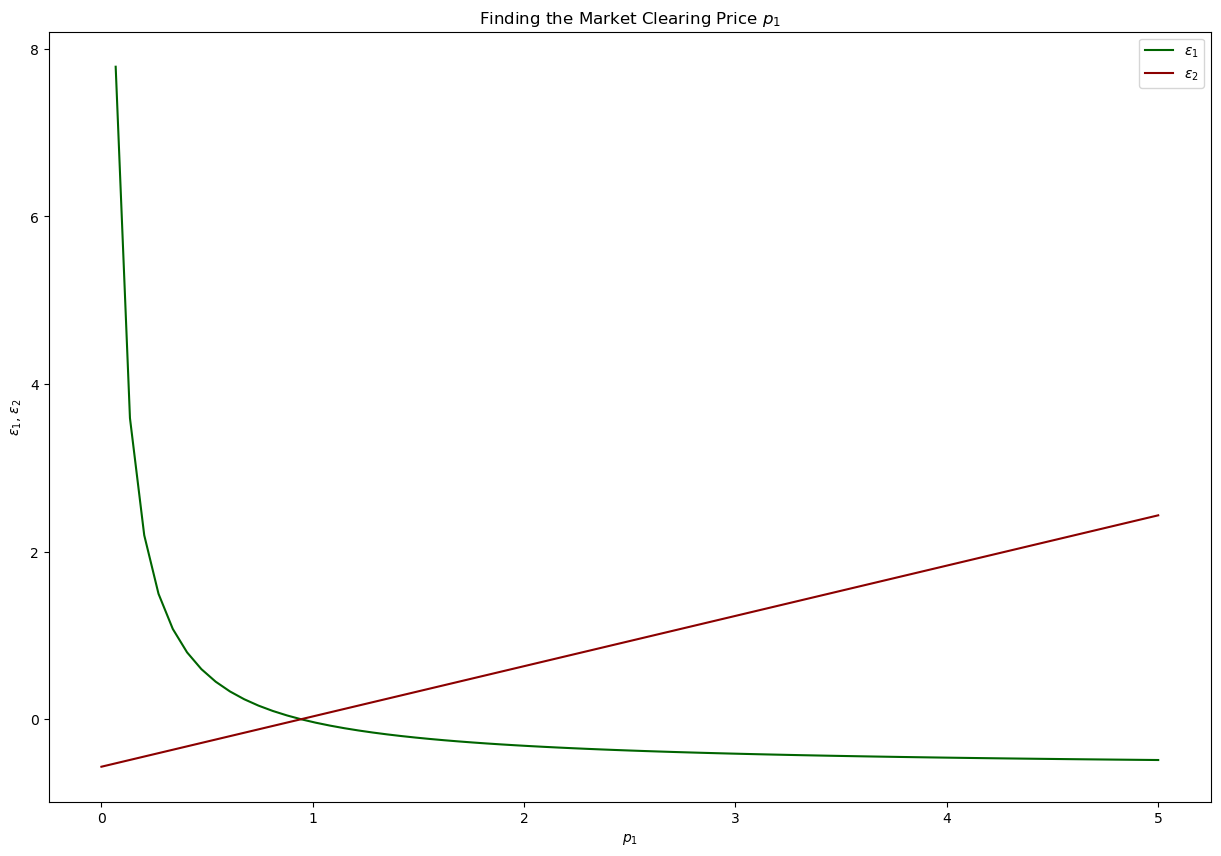

Intersection point: 0.9324324324324325


In [18]:
### DOING IT GRAPHICALLY
N  = 75
import matplotlib.pyplot as plt
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend()
plt.show()


## for which p1 do we get the intersection? 
# Find the point of intersection
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
    
        break  # Exit the loop after the first intersection is found since there is only market clearing price

print("Intersection point:", intersection_point)

In [19]:
## task 4 
## use either grid search or numerical optimizer!! 
## starting with a). 
## WE WANT TO MAXIMIZE THE UTILITY OF PERSON A WHEN ONLY PRICES IN P1 CAN BE CHOSEN 
# from Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)
type(P1)



[]
[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


numpy.ndarray

In [20]:
model.negative_utility_A(5)

-0.5256180956760201

In [25]:
# Define the initial guess
x0 = [0.5, 0.5]  # Initial guess for x_B
negative_utility = -50000
value = []
x1_0 = []
x2_0 = []
p_solution = P1[0]

for p1 in P1: 
     x1, x2 = model.demand_A(p1) 
     if 1 - x1 >= 0 and 1-x2 >= 0: 
          utility_A_now = model.utility_A(x1, x2)
     if utility_A_now > negative_utility: 
          negative_utility = utility_A_now
          value.append(negative_utility)
          x1_0.append(x1)
          x2_0.append(x2)
          p_solution = p1


print(negative_utility)
print(x1_0)
print(x2_0)
print(p_solution)
print(value)


0.6905546963623046
[0.4666666666666666, 0.45641998734977857, 0.4474984930681133, 0.43908045977011495, 0.43141131246567826, 0.4246445497630331, 0.4181818181818182, 0.41222707423580784, 0.40691912108461903, 0.40180180180180175, 0.39704476314645804, 0.39277007145859605, 0.3886178861788618, 0.3847304210940574, 0.38121420389461624, 0.3777777777777777, 0.3745415318230852, 0.37159846100034977, 0.3687074829931973, 0.3659715326050976, 0.3634720877702485, 0.36100628930817613, 0.3586629868138608, 0.35651392632524714, 0.3543859649122807, 0.35235646958011996, 0.3504889633975971, 0.3486338797814208, 0.3468591285752472, 0.34522126211050014, 0.3435897435897436, 0.3420246169304195, 0.34057649667405765, 0.3391304347826087, 0.3377398720682303, 0.3364503372877413, 0.33515981735159817, 0.33391616229544946]
[0.4666666666666667, 0.48106666666666675, 0.49493333333333345, 0.5093333333333334, 0.5237333333333335, 0.5376000000000001, 0.5520000000000002, 0.5664000000000001, 0.5802666666666668, 0.5946666666666667, 

In [26]:

### 4b 
p = 0
### 4b 
## use solver since P1 needs to positve 
from scipy import optimize

def constraint_p(p):
    return p  # This ensures that p is non-negative

#def constraints(p):
 #   x1A, x2A = model.demand_A(p)
#   x1B, x2B = model.demand_B(p)
#  return [x1A + x1B - 1, x2A + x2B - 1, p]  # Ensuring demands sum up to 1 and p is non-negative

constraints ={'type': 'ineq', 'fun': constraint_p} ## adding constraint for p 
## we have to somehow add that x1_A and x2_A need to be between 0 and 1 and x1_A + x1_B sums to 1 as well as
## as x2_A + x2_B = 1 

## bounds for solutions
bounds = [(0,None)] ## non negative price 

# c. call solver, use SLSQP
initial_guess = 1
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
model.negative_utility_A, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)

p_optimum = sol_case2.x
print(p_optimum) ## optimal price 
print(model.demand_A(p_optimum)) ## can this really be?
print(model.demand_B(p_optimum))
print(model.negative_utility_A(p_optimum))




[1.89678021]
(array([0.31938759]), array([1.21161611]))
(array([0.3793643]), array([0.35978535]))
[-0.63362065]


In [50]:
## task 5a 
# code for solving the model 
## this code is mainly from task 1!
par = model.par
parameters = model.par
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))

#print(pareto_improvements)

utility_start = -50
x1_start = 0
x2_start = 0
x_start = [0,0]
## here you solve the model 
for x in pareto_improvements: 
    if model.utility_A(x[0],x[1]) > utility_start: 
        utility_start = model.utility_A(x_start[0], x_start[1])
        x_start[0] = x[0]
        x_start[1] = x[1]

print(x_start) ## optimal allocation 
#print(x2_start)
print(model.utility_A(x_start[0], x_start[1])) ## maximized utility 

[0.5733333333333334, 0.8400000000000001]
0.7395858408079152


In [48]:
## 5b 
## for consumer B
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(model.par.w1A, model.par.w2A)})
## bounds for solutions
bounds = ((0, 1), (0, 1)) 

# c. call solver, use SLSQP
initial_guess = [0.5, 0.5]
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
    model.negative_utility_A_5b, initial_guess,
    method='SLSQP', bounds=bounds, constraints=constraints)

x1_optimal = sol_case2.x[0]
x2_optimal = sol_case2.x[1]
print(sol_case2.x[0]) ## optimal amount for person A of good 1
print(sol_case2.x[1]) ## optimal amount for person A of good 2
print(model.utility_A(x1_optimal, x2_optimal))

0.2894589077763789
0.6197031391672588
0.4808224869622358


In [77]:
b = [0.5,1]
model.aggregate_utility(b)

-0.7937005259840998

In [78]:
## task 6a 
# Define the objective function to maximize aggregate utility 
## better to define this inside the exchange economy 
#def aggregate_utility(x):
 #   xA1, xA2 = x
 #   return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

# Define the constraints for xA1 and xA2
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]})

# Bounds for solutions
bounds = ((0, 1), (0, 1)) ## both can only be between 0 and 1 

# Call the solver, use SLSQP
initial_guess = [0.5, 0.5]

sol = optimize.minimize(model.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Unpack solution
xA1_optimal = sol.x[0]
xA2_optimal = sol.x[1]
utility_A = model.utility_A(xA1_optimal, xA2_optimal)
utility_B = model.utility_B(1 - xA1_optimal, 1 - xA2_optimal)

# Print the solution
print("Optimal Allocation:")
print("xA1:", xA1_optimal)
print("xA2:", xA2_optimal)
print("Utility for A:", utility_A)
print("Utility for B:", utility_B)

Optimal Allocation:
xA1: 0.33341166147388446
xA2: 0.6665883190561481
Utility for A: 0.5291336663821624
Utility for B: 0.5291336869853834


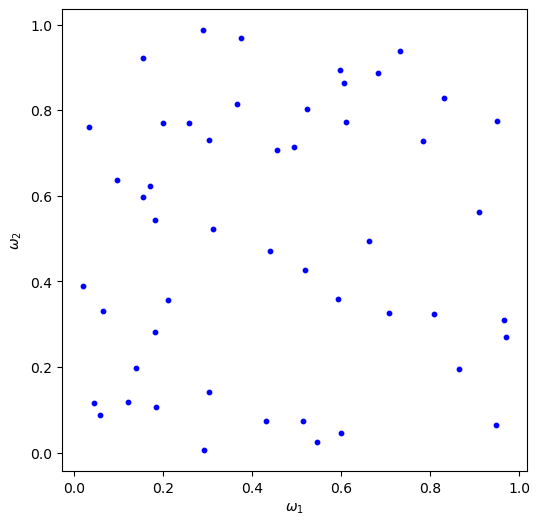

In [24]:
## more for task 7 + 8

import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate the set W with 50 elements
omega_1 = np.random.rand(50,1)
omega_2 = np.random.rand(50,1)

# Plotting setup
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Axis labels and inverted axes for B
ax_A.set_xlabel("$\\omega_1$")
ax_A.set_ylabel("$\\omega_2$")


ax_A.scatter(omega_1, omega_2, color='blue', label='Pareto Improvements', s=10)